In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions count_words_fast, read_book, and word_stats are already defined as in the Case 2 Videos (Videos 3.2.x).

book_titles is a nested dictionary, containing book titles within authors within languages, all of which are strings. These books are all stored online, and are accessed throughout this case study. In this exercise, we will first read in and store each translation of Hamlet.

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def count_words_fast(text):
    '''Count the number of times each word occurs in text (str).
    Return dictionary where keys are unique words and values are
    word counts. Skips punctuation.
    '''
    
    #lower case letters
    text = text.lower()
    
    #skip punctuation
    skips = ['.', ':', ';', "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    
    word_counts = Counter(text.split(' '))
    return word_counts

def read_book(title_path):
    '''
    Read a book and retirn it as a string
    '''
    with open(title_path, 'r', encoding = 'UTF-8') as current_file:
        text = current_file.read()
        text = text.replace('\n', '').replace('\r', '')
    return text

def word_stats(word_counts):
    '''
    Return number of unique words and
    word frequences
    '''
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

# Exercise 1

Instructions

- Write a function ```word_count_distribution(text)``` that takes a book string and returns a dictionary with items corresponding to the count of times a collection of words appears in the translation, and values corresponding to the number of number of words that appear with that frequency.
- First use ```count_words_fast(text)``` to create a dictionary called ```word_counts``` with unique words in the dictionary as keys and their frequency in the book as values.
- Next, create and return a new dictionary ```count_distribution``` with unique values from ```word_counts``` as keys and their frequency as values. For example, 'you are what you eat' contains three words that occur once and one word that occurs twice, so ```word_count_distribution('you are what you eat')``` should return a dictionary {1:3, 2:1}.
- 'Romeo and Juliet' is preloaded as ```text```. Call ```word_count_distribution(text)```, and save the result as ```distribution```.


In [3]:
def word_count_distribution(text):
    ''' 
    Takes a book string and returns a dictionary with items corresponding to the count of times a collection
    of words appears in the translation, and values corresponding to the number of number of words that appear 
    with that frequency.
    '''
    word_counts = count_words_fast(text)
    count_distribution = dict(Counter(word_counts.values()).most_common())
    return count_distribution

In [4]:
word_count_distribution('you are what you eat')

{1: 3, 2: 1}

In [5]:
text = read_book('books/English/shakespeare/Romeo and Juliet.txt')
distribution = word_count_distribution(text)

In [6]:
distribution

{1: 3693,
 2: 844,
 3: 359,
 4: 203,
 5: 120,
 6: 94,
 7: 64,
 8: 49,
 9: 51,
 10: 39,
 11: 27,
 12: 25,
 13: 19,
 14: 19,
 15: 17,
 16: 10,
 17: 12,
 18: 14,
 19: 7,
 20: 7,
 21: 13,
 22: 9,
 23: 7,
 24: 11,
 25: 3,
 26: 3,
 27: 3,
 28: 2,
 29: 1,
 30: 2,
 31: 2,
 32: 3,
 34: 3,
 35: 4,
 36: 1,
 37: 2,
 38: 1,
 39: 3,
 41: 4,
 42: 2,
 43: 1,
 44: 2,
 45: 4,
 46: 2,
 47: 5,
 48: 1,
 50: 3,
 51: 3,
 52: 2,
 53: 4,
 55: 2,
 56: 2,
 57: 1,
 58: 2,
 59: 1,
 60: 1,
 61: 2,
 62: 1,
 63: 1,
 64: 2,
 65: 2,
 67: 2,
 69: 1,
 73: 1,
 75: 1,
 79: 1,
 80: 1,
 82: 2,
 84: 1,
 85: 2,
 86: 1,
 88: 2,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 104: 1,
 106: 2,
 110: 1,
 111: 1,
 114: 1,
 115: 1,
 117: 1,
 124: 1,
 128: 2,
 130: 2,
 138: 1,
 143: 1,
 147: 1,
 163: 2,
 165: 1,
 179: 1,
 211: 1,
 222: 2,
 246: 1,
 253: 1,
 255: 1,
 268: 1,
 286: 1,
 318: 1,
 344: 1,
 360: 1,
 362: 1,
 368: 1,
 509: 1,
 527: 1,
 565: 1,
 601: 1,
 756: 1,
 834: 1,
 12183: 1}

# Exercise 2


- Create a function ```more_frequent(distribution)``` that takes a word frequency dictionary (like that made in Exercise 1) and outputs a dictionary with the same keys as those in distribution (the number of times a group of words appears in the text), and values corresponding to the fraction of words that occur with more frequency than that key.
- Call ```more_frequent(distribution)```, and store as ```cumulative```.


In [7]:
def more_frequent(distribution):
    '''
    Takes a word frequency dictionary and outputs a dictionary with the same keys as those in distribution and values corresponding to the fraction of words that occur with more frequency than that key.
    '''
    #Take the Values of the dictionary
    myValuesList = list(distribution.values())
    #Take the keys of the dictionary
    myKeyslist = list(distribution.keys())
    #cumsum the values of the dictionary
    myCumList = np.cumsum(myValuesList)
    #Sum the values of the dictionary
    mySumList =  sum(myValuesList)
    #map the values to new dictionary    
    distribution = dict(zip(myKeyslist, 1 - myCumList/mySumList))
   
    return distribution

In [8]:
cumulative = more_frequent(distribution)
print(cumulative)

{1: 0.3692570452604611, 2: 0.22510674637062345, 3: 0.16379163108454309, 4: 0.12912040990606322, 5: 0.1086251067463706, 6: 0.092570452604611497, 7: 0.081639624252775378, 8: 0.073270708795900918, 9: 0.064560204953031608, 10: 0.057899231426131514, 11: 0.053287788215200638, 12: 0.049017933390264723, 13: 0.045772843723313361, 14: 0.04252775405636211, 15: 0.0396242527754056, 16: 0.037916310845431234, 17: 0.035866780529462017, 18: 0.033475661827497838, 19: 0.032280102476515804, 20: 0.03108454312553377, 21: 0.028864218616567072, 22: 0.027327070879590076, 23: 0.026131511528608042, 24: 0.024252775405636195, 25: 0.023740392826643864, 26: 0.023228010247651532, 27: 0.022715627668659311, 28: 0.022374039282664349, 29: 0.022203245089666979, 30: 0.021861656703672128, 31: 0.021520068317677166, 32: 0.021007685738684834, 34: 0.020495303159692613, 35: 0.0198121263877028, 36: 0.01964133219470543, 37: 0.019299743808710468, 38: 0.019128949615713098, 39: 0.018616567036720766, 41: 0.017933390264730953, 42: 0.01

# Exercise 3

Edit the code used to read though each of the books in our library, and store the word frequency distribution for each translation of William Shakespeare's "Hamlet" as a Pandas dataframe ```hamlets``` with columns named "language" and "distribution". 
```word_count_distribution``` is preloaded from Exercise 1. How many translations are there? Which languages are they translated into?

In [10]:
hamlets = pd.DataFrame(columns=('language','distribution'))
book_dir = './books'
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + '/' + author):
            if title == "Hamlet.txt":
                inputfile = book_dir + '/' + language + '/' + author + '/' + title
                #data_filepath+"Books/"+language+"/"+author+"/"+title+".txt"
                text = read_book(inputfile)
                distribution = word_count_distribution(text)
                hamlets.loc[title_num] = language, distribution
                title_num += 1

In [11]:
hamlets

,language,distribution
1,English,"{1: 5180, 2: 647, 3: 250, 4: 146, 5: 92, 6: 56..."
2,German,"{1: 8216, 2: 947, 3: 386, 4: 207, 5: 122, 6: 7..."
3,Portuguese,"{1: 8239, 2: 1045, 3: 392, 4: 221, 5: 109, 6: ..."


# Exercise 4

Plot the word frequency distributions of each translations on a single log-log plot. Note that we have already done most of the work for you. Do the distributions of each translation differ?

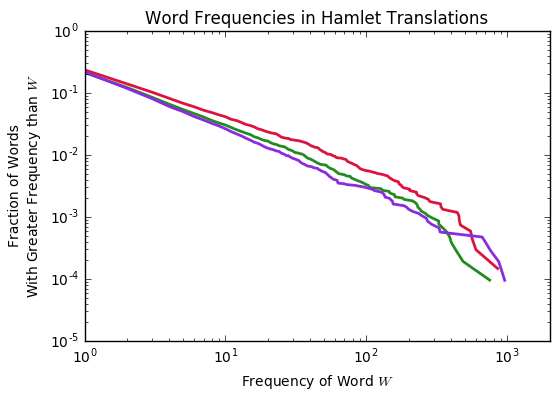

In [15]:
colors = ["crimson", "forestgreen", "blueviolet"]
handles, hamlet_languages = [], []
for index in range(hamlets.shape[0]):
    language, distribution = hamlets.language[index+1], hamlets.distribution[index+1]
    dist = more_frequent(distribution)
    plot = plt.loglog(sorted(list(dist.keys())),sorted(list(dist.values()), reverse = True), color = colors[index], linewidth = 2)
    handles.append(plot)
    hamlet_languages.append(language)
plt.title("Word Frequencies in Hamlet Translations")
xlim    = [0, 2e3]
xlabel  = "Frequency of Word $W$"
ylabel  = "Fraction of Words\nWith Greater Frequency than $W$"
plt.xlim(xlim); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.legend(handles, hamlet_languages, loc = "upper right", numpoints = 1);
# show your plot using `plt.show`!
plt.show();